## Group Project Report

##### Composed by: Jennifer Tanojo, Abhishek Ramaesh, Zheyu Su

# Classification Model to Predict Fraudulent Firms Based on Audit Data

## Introduction

#### Background Information
Audit usually refers to a financial statement audit or an objective examination and evaluation of a company's financial statements--usually performed by an external third party (*Corporate Finance Institute*). Audits are performed to solve a specific problem or to meet certain goals related to the data; it is an important tool to describe the examination and verification of a company's financial records. The purpose of auditing is to guarantee that financial information is fairly and accurately reflected. The audit data can be used to evaluate the quality, safety, and compliance of various objects in accordance with the relevant accounting standards.

"Audit can be done internally by employees or heads of a particular department and externally by an outside firm or an independent auditor. The idea is to check and verify the accounts by an independent authority to ensure that all books of accounts are done in a fair manner and there is no misrepresentation or fraud that is being conducted.

All the public listed firms have to get their accounts audited by an independent auditor before they declare their results for any quarter.

Who can perform an audit? In India, chartered accountants from ICAI or The Institute of Chartered Accountants of India can do independent audits of any organisation." (*The Economic Times*).

"Fraud in audits is when an entity is found to have illegally altered financial statements to manipulate its financial health or to hide profit or losses." (*Corporate Finance Institute*). Our group project is dedicated to build a classification model to help auditors classify whether a firm is fraudulent or not based on the data that we have.

#### Question to be Answered with Our Project
Can we predict whether or not a firm is fraudulent based on the known variables?
- The purpose of the our group project is to help auditors by building a classification model that can predict fraudulent companies based on current and historical risk factors, which can be referenced through the audit data set that we have chosen. 

#### Identification and Description of the Dataset 
The dataset that we have chosen is the **Audit Data**, which was accessed through the link provided on Canvas: https://archive.ics.uci.edu/ml/datasets/Audit+Data.

We used the file named `audit_risk.csv` that we have acquired through the website for our data analysis. There were 27 variables listed in the data set, which are essentially the many risk factors that were examined from various areas. These risks include: the past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports, etc. After in-depth interview with the auditors, important risk factors were evaluated and their probability of existence is calculated from the present and past records.

## Methods and Results

#### Loading the necessary libraries and packages into the Jupyter Notebook:

In [1]:
# loaded the necessary libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(magrittr)
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

#### Reading the dataset can be read from the web into R:
Firstly, we downloaded the data folder locally and pushed the files into our project’s GitHub repository. Then, we read in the csv file using the corresponding `read_*` function, which is `read_csv`.

The information provided of the **Audit Data** tells us that it contains the exhaustive one year non-confidential data of firms in the year 2015 to 2016, collected from the Auditor Office of India. The variables are the many risk factors listed on the table are "examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports, etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records" (Hooda).

In [2]:
# demonstrate how the data is read into R and convert Risk (our classifier) as a factor
audit <- read_csv("audit_data/audit_risk.csv") |> mutate(Risk = as_factor(Risk))

# viewing the data as a table of the data
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


*1.1.1 Table containing the first 6 rows of Audit Data `audit` acquired from the imported `audit_risk.csv` file*

In [3]:
# taking a glimpse of the audit data
glimpse(audit)

Rows: 776
Columns: 27
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ LOCATION_ID    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ PARA_A         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ Score_A        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ Risk_A         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ PARA_B         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ Score_B...7    <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ Risk_B         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ TOTAL          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ Score_B...11   <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ Risk_C         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ Money_Value    <

#### Cleaning and wrangling the data into a tidy format:
To the loaded data, we need to do some minor tidying steps: cleaning the names and deleting duplicate columns.

In [4]:
# since there was a duplicate of the probability column, we remove one of them
audit <- audit |> select(-Prob)

# cleaning and wrangling the data into a tidy format: tidying the column names
colnames(audit) %<>% tolower
head(audit)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.2,0.4,0,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.2,0.4,0,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.2,0.4,0,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.2,0.4,0,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.2,0.4,0,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.2,0.4,0,0,2.0,2.156,0.4,0.5,0.4312,0


*1.1.2 Table containing the first 6 rows of the cleaned and wrangled Audit Data `audit`*

#### Taking a glimpse of the number of observations in each class:

In [5]:
# taking a glimpse of the audit data set 
glimpse(audit)

Rows: 776
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ para_a         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ score_a        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ risk_a         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ para_b         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ risk_b         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ total          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ risk_c         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ money_value    <

By taking a glimpse of the dataset, we can see that the sector_score, location_id, and numbers might not very helpful when building our model due to their (likely) low relevance with the risk of fraudulence that we are trying to predict. We can also notice that the the dataset has provided the total of the different scores in the score column, and the total of all the audit-paras in the total column. The different risks are also then classified and redefined in the columns near the end; inherent_risk, control_risk, detection_risk, and audit_risk. We can see that the classification is at the risk column, and for our purposes, we will suppose that the value 1 means that the risk of the firm being fraudulent is true, while if the value is 0 it means that there is no risk that it is a fraudulent firm (false).

In building our classification model, we are going to utilize the $K$-nearest neighbor classification algorithm, seeing as we are working with a categorical variable; we are predicting whether the firm is fraudulent or not.

#### Splitting the data set into training and test sets:
Since the typical training set is between 50% and 95% of the data, and test set being the remaining 5% to 50%; our intuition here is that we want to trade off between training an accurate model (by using a larger training data set) and getting an accurate evaluation of its performance (by using a larger test data set). We think that having 75% of the data for the training set and having 25% for the testing set is highly beneficial for us with regards to our intuition.

In [6]:
# using set.seed(8888) to make the dataset reproducible
set.seed(8888)

# split the audit data into training and test set in the decided ratio
audit_split <- initial_split(audit, prop = 0.75, strata = risk)

audit_training <- training(audit_split)
# Remove rows with NA values
audit_training <- na.omit(audit_training)

audit_testing <- testing(audit_split)
# Remove rows with NA values
audit_testing <- na.omit(audit_testing)

#### Viewing and taking a glimpse of the training data set:

In [7]:
# viewing the training set in a table
head(audit_training)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.2,0.4,0,0,2.0,2.5540,0.4,0.5,0.51080,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.2,0.4,0,0,2.0,1.5480,0.4,0.5,0.30960,0
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.2,0.4,0,0,2.0,1.4160,0.4,0.5,0.28320,0
3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5,⋯,0.2,0.4,0,0,2.4,4.3720,0.4,0.5,0.87440,0
3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5,⋯,0.2,0.4,0,0,2.2,1.9060,0.4,0.5,0.38120,0
3.89,4,0.00,0.2,0.000,1.10,0.2,0.220,1.10,5,⋯,0.2,0.4,0,0,2.0,1.6214,0.4,0.5,0.32428,0


*1.2 Table containing the first 6 rows of the training set of the audit data `audit_training`*

In [8]:
# taking a glimpse of the training set
glimpse(audit_training)

Rows: 581
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "6", "6", "6", "8", "8", "4", "14", "37", "5", "5", "5"…
$ para_a         <dbl> 0.00, 0.51, 0.00, 3.98, 1.09, 0.00, 0.00, 0.00, 0.00, 0…
$ score_a        <dbl> 0.2, 0.2, 0.2, 0.6, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_a         <dbl> 0.000, 0.102, 0.000, 2.388, 0.436, 0.000, 0.000, 0.000,…
$ para_b         <dbl> 4.83, 0.23, 0.08, 0.99, 0.35, 1.10, 1.03, 0.75, 1.76, 2…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_b         <dbl> 0.966, 0.046, 0.016, 0.198, 0.070, 0.220, 0.206, 0.150,…
$ total          <dbl> 4.83, 0.74, 0.08, 4.97, 1.44, 1.10, 1.03, 0.75, 1.76, 2…
$ numbers        <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5…
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ money_value    <

#### Viewing and taking a glimpse of the testing data set:

In [9]:
# viewing the testing set in a table
head(audit_testing)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,⋯,0.2,0.4,0,0,2.4,8.5740,0.4,0.5,1.71480,1
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,⋯,0.2,0.4,0,0,4.4,17.5300,0.4,0.5,3.50600,1
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,⋯,0.2,0.4,0,0,2.0,2.1560,0.4,0.5,0.43120,0
3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,⋯,0.2,0.4,0,0,3.2,31.7740,0.4,0.5,6.35480,1
3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,⋯,0.2,0.4,0,0,4.2,18.0340,0.4,0.5,3.60680,1
3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,5.0,⋯,0.2,0.4,0,0,2.0,1.5694,0.4,0.5,0.31388,0


*1.3 Table containing the first 6 rows from the testing set of the audit data `audit_testing`*

In [10]:
# taking a glimpse of the testing set
glimpse(audit_testing)

Rows: 194
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "23", "6", "6", "7", "8", "8", "37", "37", "24", "3", "…
$ para_a         <dbl> 4.18, 0.00, 0.00, 1.10, 8.50, 0.00, 4.18, 1.81, 6.26, 0…
$ score_a        <dbl> 0.6, 0.2, 0.2, 0.4, 0.6, 0.2, 0.6, 0.4, 0.6, 0.2, 0.2, …
$ risk_a         <dbl> 2.508, 0.000, 0.000, 0.440, 5.100, 0.000, 2.508, 0.724,…
$ para_b         <dbl> 2.50, 10.80, 0.83, 7.41, 12.03, 0.84, 4.83, 1.03, 14.10…
$ score_b...7    <dbl> 0.2, 0.6, 0.2, 0.4, 0.6, 0.2, 0.2, 0.2, 0.6, 0.4, 0.2, …
$ risk_b         <dbl> 0.500, 6.480, 0.166, 2.964, 7.218, 0.168, 0.966, 0.206,…
$ total          <dbl> 6.68, 10.80, 0.83, 8.51, 20.53, 0.84, 9.01, 2.84, 20.36…
$ numbers        <dbl> 5.0, 6.0, 5.0, 5.0, 5.5, 5.0, 5.5, 5.0, 5.0, 5.0, 5.0, …
$ score_b...11   <dbl> 0.2, 0.6, 0.2, 0.2, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 1.0, 3.6, 1.0, 1.0, 2.2, 1.0, 2.2, 1.0, 1.0, 1.0, 1.0, …
$ money_value    <

#### Using only training data and summarize the data in one table with the chosen predictor variables:
From our dataset, we first only work with the training set and choose only 10 out of the 27 variables for further analysis, which are: `total`, `money_value`, `district_loss`, `history`, `prob`, `score`, `inherent_risk`, `control_risk`, `audit_risk`, `risk`. This is because we believe that these are the variables that are most reflective of the trend that we are trying to analyze and build our classification model from. Some of the other variables are somewhat stagnant, so they may not help with our analysis and building our classification model as much.

In [11]:
# summarizing the training data--selecting the chosen predictor variables
audit_training <- audit_training |> select(total, money_value, district_loss, history, 
                                           prob, score, inherent_risk, control_risk, 
                                           audit_risk, risk)

glimpse(audit_training)
head(audit_training)

Rows: 581
Columns: 10
$ total         <dbl> 4.83, 0.74, 0.08, 4.97, 1.44, 1.10, 1.03, 0.75, 1.76, 2.…
$ money_value   <dbl> 0.940, 0.000, 0.000, 1.930, 0.000, 0.007, 0.000, 6.780, …
$ district_loss <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,…
$ history       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ prob          <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0…
$ score         <dbl> 2.0, 2.0, 2.0, 2.4, 2.2, 2.0, 2.0, 2.2, 2.0, 2.0, 2.0, 2…
$ inherent_risk <dbl> 2.5540, 1.5480, 1.4160, 4.3720, 1.9060, 1.6214, 1.6060, …
$ control_risk  <dbl> 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0…
$ audit_risk    <dbl> 0.51080, 0.30960, 0.28320, 0.87440, 0.38120, 0.32428, 0.…
$ risk          <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


total,money_value,district_loss,history,prob,score,inherent_risk,control_risk,audit_risk,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.83,0.940,2,0,0.2,2.0,2.5540,0.4,0.51080,0
0.74,0.000,2,0,0.2,2.0,1.5480,0.4,0.30960,0
0.08,0.000,2,0,0.2,2.0,1.4160,0.4,0.28320,0
4.97,1.930,2,0,0.2,2.4,4.3720,0.4,0.87440,0
1.44,0.000,2,0,0.2,2.2,1.9060,0.4,0.38120,0
1.10,0.007,2,0,0.2,2.0,1.6214,0.4,0.32428,0


*1.4 Table containing the first 6 rows from the training set `audit_training` with the chosen variables (the necessary classifier and predictors)*

#### Using only training data and visualize the data with three plots relevant to the analysis:

Using the chosen variables, we can visualize the existing patterns using scatter plots. However, since it is not very effective to visualize graphs in 3-dimensions or more, we can choose variables that would show the existing relationships to help us build the classification model.

Since we prefer 2-D plots for visualization, we choose three variables to help visualize for each plot. We have made four plots to get a good estimate of the predictor variables and the prediction model that we are building:

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


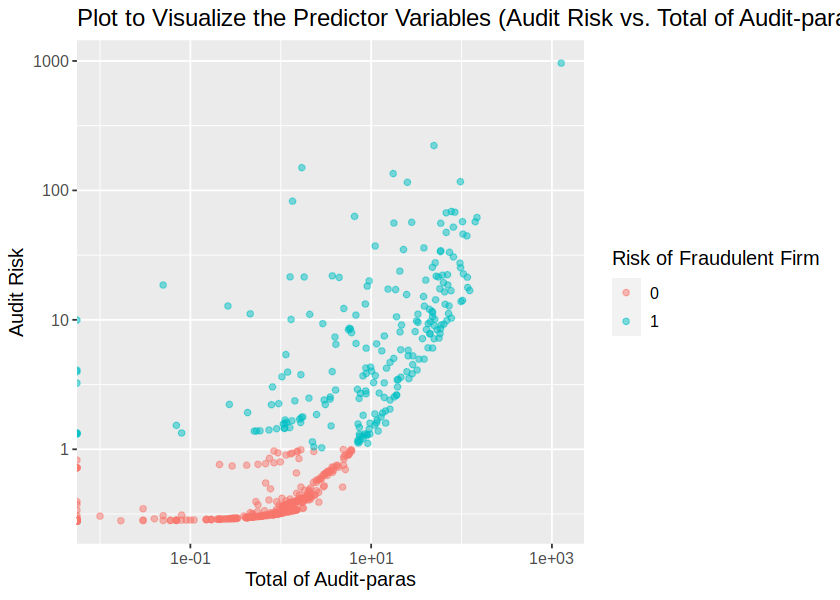

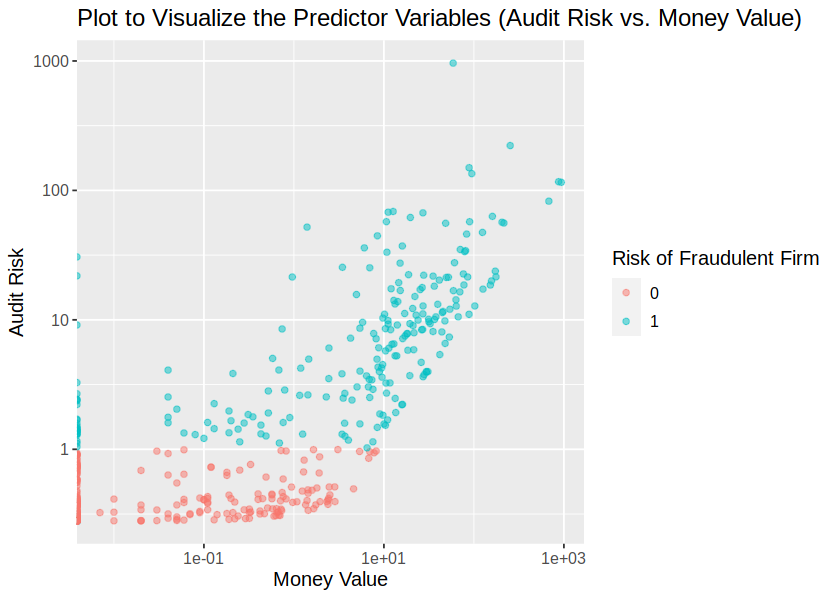

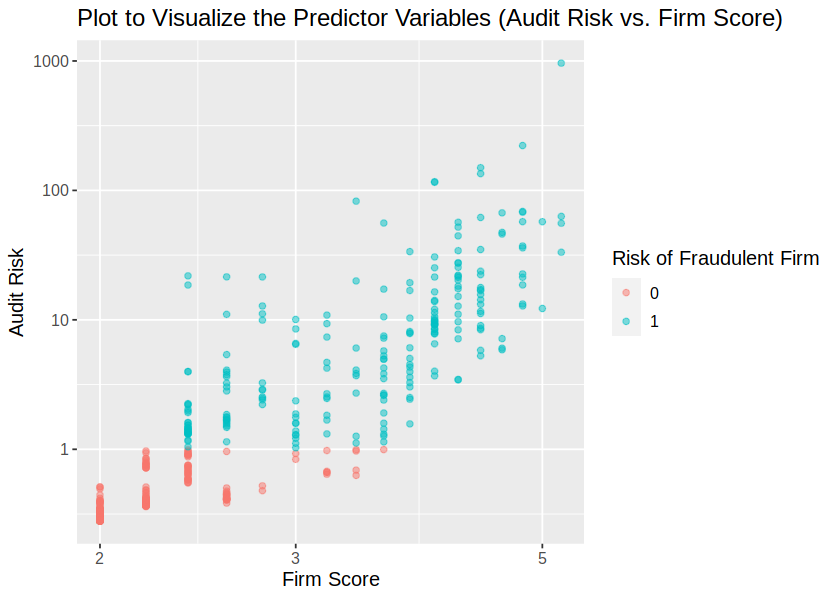

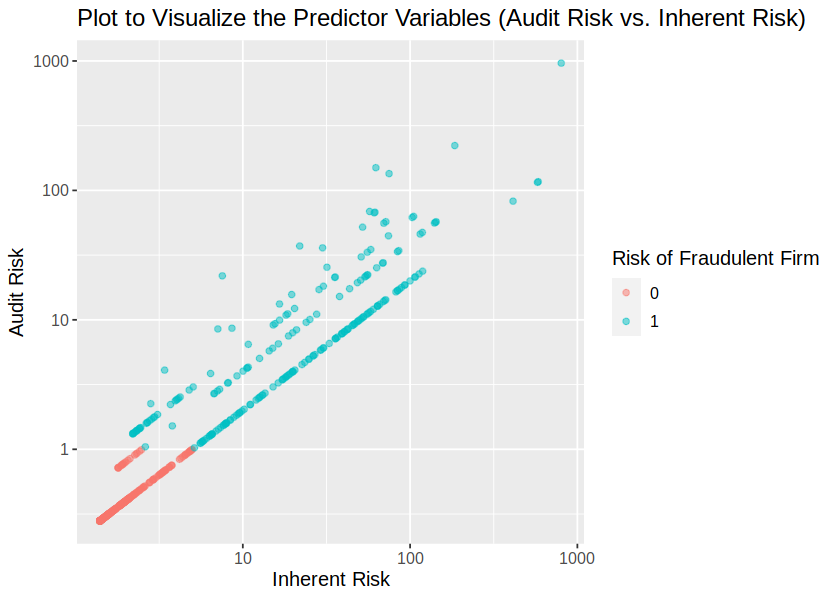

In [12]:
# using scatter plots to visualize
options(repr.plot.width = 7, repr.plot.height = 5)

audit_training_plot0 <- audit_training |> ggplot(aes(x = total, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Total of Audit-paras", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Total of Audit-paras)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot0

audit_training_plot1 <- audit_training |> ggplot(aes(x = money_value, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Money Value", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Money Value)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot1

audit_training_plot2 <- audit_training |> ggplot(aes(x = score, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Firm Score", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Firm Score)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot2

audit_training_plot3 <- audit_training |> ggplot(aes(x = inherent_risk, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Inherent Risk", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Inherent Risk)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot3

*1.5 Plots visualizing the relationships between variables in the dataset*

In the graphs, we could see the relationship between two variables, with the risk of fraudulent firms denoted by the different colors. For all of the graphs, we can see that the variables have a positive relationship with each other; the first two graphs are seen to be in an exponentially correlated, while the last two are seen to be a weak linear relationship and a strong linear relationship respectively. By looking at the graphs that we have made, the thing that we an notice is that as the values increase, there is a risk that the firm is fraudulent.

#### Creating a tidymodels recipe to standardize all of the variables in the dataset and bake the recipe to examine the output :
Since the $K$-nearest neighbors algorithm is sensitive to the scale of the predictors, we need to scale and center our data to standardize them using the `recipe()` function (using the training data) and we can then examine our work by using the `bake()` function.

In [13]:
# set the seed
set.seed(8888)

# creating the recipe
audit_recipe <- recipe(risk ~. , data = audit_training) |>
step_scale(all_predictors()) |> step_center(all_predictors())
audit_recipe

# examining the output
audit_training_scaled <- audit_recipe |> prep() |> bake(audit_training)
head(audit_training_scaled)
tail(audit_training_scaled)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          9

Operations:

Scaling for all_predictors()
Centering for all_predictors()

total,money_value,district_loss,history,prob,score,inherent_risk,control_risk,audit_risk,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.1506757,-0.1994558,-0.4006731,-0.1998555,-0.1638214,-0.8124125,-0.2739046,-0.3706664,-0.1633115,0
-0.2222462,-0.2138228,-0.4006731,-0.1998555,-0.1638214,-0.8124125,-0.2920514,-0.3706664,-0.1679550,0
-0.2337955,-0.2138228,-0.4006731,-0.1998555,-0.1638214,-0.8124125,-0.2944325,-0.3706664,-0.1685643,0
-0.1482259,-0.1843245,-0.4006731,-0.1998555,-0.1638214,-0.3507874,-0.2411106,-0.3706664,-0.1549201,0
-0.2099970,-0.2138228,-0.4006731,-0.1998555,-0.1638214,-0.5816000,-0.2855936,-0.3706664,-0.1663026,0
-0.2159466,-0.2137158,-0.4006731,-0.1998555,-0.1638214,-0.8124125,-0.2907273,-0.3706664,-0.1676162,0


total,money_value,district_loss,history,prob,score,inherent_risk,control_risk,audit_risk,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.23519538,-0.2138228,2.9013276,-0.1998555,-0.1638214,-0.3507874,-0.2802903,1.2987690,-0.14463616,1
-0.19862268,1.1363722,-0.4006731,-0.1998555,-0.1638214,-0.1199749,0.6747040,-0.3706664,0.07942232,1
-0.03080827,-0.2138228,-0.4006731,-0.1998555,-0.1638214,0.5724628,-0.1683073,-0.3706664,-0.13629085,1
-0.23519538,-0.2138228,2.9013276,-0.1998555,-0.1638214,-0.3507874,-0.2802903,1.2987690,-0.14463616,1
-0.20562224,-0.2000671,2.9013276,-0.1998555,-0.1638214,-0.1199749,-0.2671222,1.2987690,-0.13452763,1
-0.08662975,-0.2072506,-0.4006731,-0.1998555,-0.1638214,0.5724628,-0.2012816,-0.3706664,-0.14472847,1


*1.6 Tables containing the first and last 6 rows of the standardized training set `audit_training_scaled`*

#### Creating a model specification with `tune()` on the number of neighbours:
In the $K$-nearest neighbors classification algorithm, $K$ is a parameter that we have to pick that determines how many neighbors participate in the class vote. By picking different values of $K$, we create different classifiers that make different predictions which will then help us pick the best $K$-value to use for our classification model by the help of the cross-validation method.

In [14]:
# set the seed
set.seed(8888)

# model specification with tune() on the number of neighbours
audit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |> set_mode("classification")
audit_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### Choosing the best value of $K$ and maximizing the accuracy of the classifier:
To do this, we perform a 5-fold cross-validation on the training set with the decided possible K-values: from 1 to 9, since large K-values yield less accurate predictions. Then, we will be able to establish a workflow analysis with our already-made recipe and specification.

In [15]:
# set the seed
set.seed(8888)

# performing the 5-fold cross-validation on the training set, with possible K-values from 1 to 9
vfold <- vfold_cv(audit_training, v = 5, strata = risk)
k_val <- tibble(neighbors = seq(from = 1, to = 9, by = 1))

# create a workflow analysis with your recipe and model specification
vfold_workflow <- workflow() |> add_recipe(audit_recipe) |>
add_model(audit_spec) |> tune_grid(resamples = vfold, grid = k_val)

#### Collecting the metrics from the workflow analysis:

In [16]:
# collecting the metrics and plotting the k vs the accuracy
accuracies <- vfold_workflow |> collect_metrics() |> filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9827573,5,0.004722857,Preprocessor1_Model1
2,accuracy,binary,0.9827573,5,0.004722857,Preprocessor1_Model2
3,accuracy,binary,0.9828168,5,0.002679855,Preprocessor1_Model3
4,accuracy,binary,0.9828168,5,0.002679855,Preprocessor1_Model4
5,accuracy,binary,0.9775994,5,0.007039598,Preprocessor1_Model5
6,accuracy,binary,0.9775994,5,0.007039598,Preprocessor1_Model6
7,accuracy,binary,0.9706429,5,0.010475975,Preprocessor1_Model7
8,accuracy,binary,0.9706429,5,0.010475975,Preprocessor1_Model8
9,accuracy,binary,0.9723820,5,0.012034733,Preprocessor1_Model9


*1.7 Table containing the collected metrics from the workflow analysis after tuning the neighbors `accuracies`*

#### Plotting the K-neighbors vs. the Accuracy of the classifier:

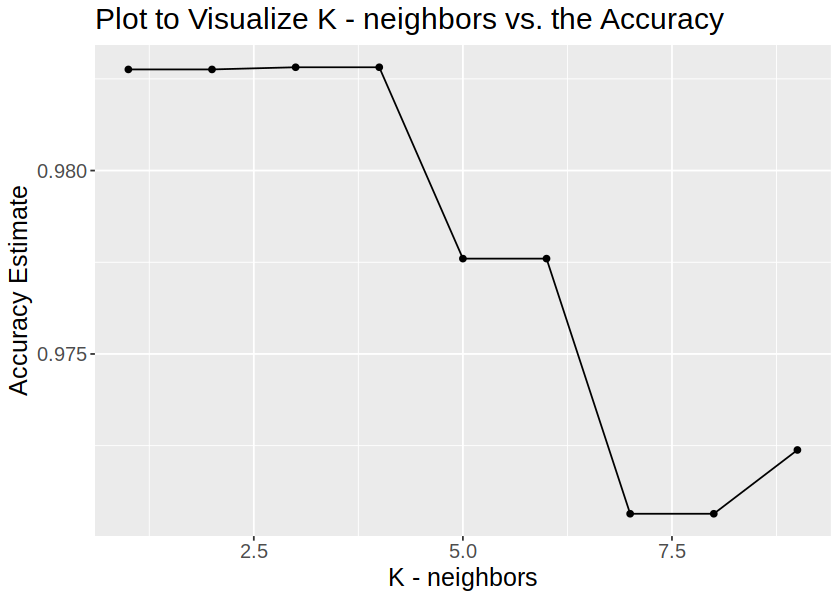

In [17]:
# plotting the K-neighbors vs the accuracy
options(repr.plot.width = 7, repr.plot.height = 5)

cross_validation_plot <- accuracies |> ggplot(aes(x = neighbors, y = mean)) + geom_point() +
geom_line() + labs(x = "K - neighbors", y = "Accuracy Estimate") + 
ggtitle("Plot to Visualize K - neighbors vs. the Accuracy") + theme(text = element_text(size = 15))
cross_validation_plot

*1.8 Plot of the K-neighbors vs. the Accuracy acquired from the cross-validation `cross_validation_plot`*

Based on the table and the plot made, we can see that we can either choose $K = 3$ or $K = 4$ for the knn-classification of our dataset since it is shown to have the highest estimated accuracy when we do cross-validation on the training data set (cross-validation gives us an estimate of the true accuracy of each value of k in a reasonable range, and also helps us evaluate the accuracy of our classifier). For our final model, we will choose $K = 3$.

#### Building the final model:
Now that we have explored our data, separated the data into training and testing sets, and applied cross-validation to choose the best $K$, we can build our final model. We start by making the `nearest_neighbor` specification, this time with the chosen $K$-value ($K$ = 3) and then we pass the model specification and our recipe into the `fit()` function.

In [18]:
# set the seed
set.seed(8888)

# model specification with K = 3 the number of neighbours
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |> set_mode("classification")
final_spec

# passing the model specification and the training data set to the fit() function.
audit_fit <- workflow() |> add_recipe(audit_recipe) |> add_model(final_spec) |> 
fit(data = audit_training)
audit_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.02065404
Best kernel: rectangular
Best k: 3

#### Using our final model, we predict on the test dataset:

In [19]:
# setting the seed
set.seed(8888) 

# predicting on the test set using the final classification model
audit_predictions <- predict(audit_fit, audit_testing) |> bind_cols(audit_testing)
audit_predictions

New names:
• `score_b...7` -> `score_b...8`
• `score_b...11` -> `score_b...12`


.pred_class,sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...8,risk_b,total,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,⋯,0.2,0.4,0,0.0,2.4,8.5740,0.4,0.5,1.71480,1
1,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,⋯,0.2,0.4,0,0.0,4.4,17.5300,0.4,0.5,3.50600,1
0,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,⋯,0.2,0.4,0,0.0,2.0,2.1560,0.4,0.5,0.43120,0
1,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,⋯,0.2,0.4,0,0.0,3.2,31.7740,0.4,0.5,6.35480,1
1,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,⋯,0.2,0.4,0,0.0,4.2,18.0340,0.4,0.5,3.60680,1
0,3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,⋯,0.2,0.4,0,0.0,2.0,1.5694,0.4,0.5,0.31388,0
1,3.89,37,4.18,0.6,2.508,4.83,0.2,0.966,9.01,⋯,0.2,0.4,0,0.0,3.2,14.4920,0.4,0.5,2.89840,1
0,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,⋯,0.2,0.4,0,0.0,2.2,2.3300,0.4,0.5,0.46600,0
1,3.89,24,6.26,0.6,3.756,14.10,0.6,8.460,20.36,⋯,0.2,0.4,1,0.4,4.2,34.5600,0.8,0.5,13.82400,1


*1.9 Table containing the testing_set of the audit data `audit_testing` along with a column of the predicted class `.pred_class` from our final classification model*

#### Reporting the accuracy of the classification model:

In [20]:
# setting the seed
set.seed(8888) 

# reporting the accuracy (metrics) of our final classification model
audit_metrics <- audit_predictions |> metrics(truth = risk, estimate = .pred_class)
audit_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9845361
kap,binary,0.9677705


*1.10 Table containing the metrics (more specifically, accuracy) of our final classification model `audit_metrics`*

#### Reporting the confusion matrix:

In [21]:
# setting the seed
set.seed(8888)

# producing the confusion matrix of our final classification model
audit_conf_mat <- audit_predictions |> conf_mat(truth = risk, estimate = .pred_class)
audit_conf_mat

          Truth
Prediction   0   1
         0 115   1
         1   2  76

*1.11 Confusion matrix of our final classification model `audit_conf_mat`*

From the report of accuracy and the confusion matrix above, we can see that we have a high estimated accuracy of approximately 98.45%, a precision of 115/116 (which is approximately 99.14%) and a recall of 115/117 (which is approximately 98.29%).

## Discussion

#### Summary of Findings:
In building this classification model, we have utilized the $K$-nearest neighbor classification algorithm with multiple predictors that have been chosen from the dataset to classify whether a firm is fraudulent or not based on the existing data, and utilized `set.seed(8888)` to have a reproducible data. We first decided on the predictors by looking at the graphs plotted in the earlier analysis, and we chose the best value of $K$ (and maximized the accuracy of the model at the same time) by applying the cross-validation method. After we chose $K = 3$ as our value, we proceed to build our final model with the corresponding `nearest_neighbor` specification and the `recipe` will all our chosen predictors and the standardized data. After we have passed them to the `fit()` function and predicted on the testing set (`audit_testing`) with the model, we can report its accuracy and view its confusion matrix.

Since we found that our classification model has a very high estimated accuracy of approximately 98.45%, we can conclude that our classifier is appropriate to be used by auditors to help them classify whether a firm is fraudulent or not based on the data that they already have.

#### Outcomes:
By building this classification model, we can find--or can classify--fraudulent firms in the midst of non-fraudulent or non-suspicious ones. We also find that our classification model have a relatively high estimated accuracy so this model can be helpful for the auditors. This outcome is aligned with our expected outcomes for our group project.

#### Possible Impact:
Such findings could contribute to the work of auditors. This would help immensely as they examine, analyze, and interpret accounting records  or audit and evaluate statements as they would immediately be able to classify whether the firm is fraudulent or not by using the model.

#### Possible Future Questions:
Would this classification model still have the same estimated accuracy for audit data collected in the present or coming years?
- Since the data was collected in the year 2015 to 2016, possible future questions would include whether or not this classification model would still have the same estimated accuracy for the present or coming years.

## References
Works Cited

“Auditing.” *Corporate Finance Institute*, 8 Nov. 2023, corporatefinanceinstitute.com/resources/accounting/what-is-an-audit/. Accessed 4 Dec. 2023.

“Fraud in Audits.” *Corporate Finance Institute*, 5 Dec. 2023, corporatefinanceinstitute.com/resources/accounting/fraud-audit/. Accessed 5 Dec. 2023.

Hooda, Nishtha. "Audit Data." 2018, *UCI Machine Learning Repository*, doi.org/10.24432/C5930Q. Accessed 26 Nov. 2023. 

Timbers, Tiffany, et al. “Data Science: A First Introduction.” *Chapter 6 Classification II: Evaluation & Tuning*, 31 Aug. 2023, datasciencebook.ca/classification2.html#evaluating-performance-with-tidymodels. Accessed 26 Nov. 2023.


“What Is ‘Audit’?” *The Economic Times*, economictimes.indiatimes.com/definition/audit. Accessed 4 Dec. 2023.